<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210121_boston_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#보스턴 집값예측
- 독립변수가 여러개인 경우


##수식과 퍼셉트론
- Dense layer:수식을 만드는 것
- 컴퓨터는 이 수식의 parameter를 찾는것
-> 퍼셉트론(perceptron)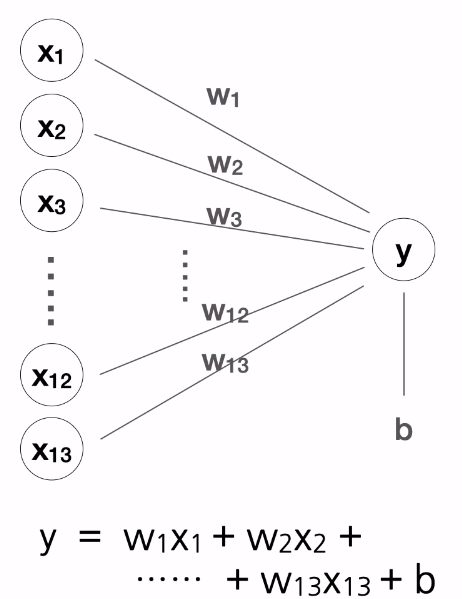
-> w:가중치(weight) , b:편향(bias)

In [1]:
import pandas as pd
import tensorflow as tf

In [3]:
#1. 과거의 데이터 준비
path='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(path)
print(boston.columns)
boston.head()


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
독립=boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
종속=boston[['medv']]
print(독립.shape,종속.shape)

(506, 13) (506, 1)


In [8]:
#2. 모델구조 만들기
X=tf.keras.layers.Input(shape=[13])
Y=tf.keras.layers.Dense(1)(X)
model=tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [13]:
#3. 모델 학습시키기
model.fit(독립,종속,epochs=10000,verbose=0)
model.fit(독립,종속,epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 24.0531
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 23.7247
Epoch 3/10
16/16 [==============================] - 0s 991us/step - loss: 23.7104
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 23.5820
Epoch 5/10
16/16 [==============================] - 0s 996us/step - loss: 24.2531
Epoch 6/10
16/16 [==============================] - 0s 934us/step - loss: 23.5071
Epoch 7/10
16/16 [==============================] - 0s 987us/step - loss: 23.7942
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 23.4955
Epoch 9/10
16/16 [==============================] - 0s 985us/step - loss: 23.4193
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 24.4040


In [14]:
#4. 모델을 이용한다
model.predict(독립[0:5]) #첫번째 부터 5번째 까지의 값

array([[29.904133],
       [24.753063],
       [31.231567],
       [29.82484 ],
       [29.447544]], dtype=float32)

In [15]:
종속[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
#모델의 수식확인
model.get_weights()

[array([[-0.09310748],
        [ 0.04843121],
        [-0.02130147],
        [ 2.6391332 ],
        [-2.3119154 ],
        [ 5.237623  ],
        [-0.00952709],
        [-1.0690603 ],
        [ 0.20017645],
        [-0.0106201 ],
        [-0.52455443],
        [ 0.01344943],
        [-0.4622539 ]], dtype=float32), array([8.815234], dtype=float32)]

집값=-0.09310748*x1 + 0.04843121*x2 -0.02130147*x3 + 2.6391332*x4 -2.3119154*x5 + 5.237623*x6 - 0.00952709*x7 -1.0690603*x8 + 0.20017645*x9 -0.0106201*x10 -0.52455443*x11 + 0.01344943*x12 - 0.4622539*x13 + 8.815234